####  Big data project 
### Team Name :  Data dynamo.
### Team members :
#####  Meghanjali CHennupati (U30308400)
#####  Aarsha joji (U74440593) 
#####  Shambhavi Mishra (U01040066)
#####  Mounica Pothureddy (U96174850) 
###### Pradeep Reddy (U23954564)

##### Business problem statement :   Bank Marketing data set:
#####  Link to the data set : https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing
#####  Data set description : The data set is related to the direct campaigns of a portuguese  banking institution . The goal is to predict whetegr the client will subscribe to the term deposit or not. The data set is related to direct marketing campaign of a portuguese banking institution. these were based on phone calls often more than once the same client required in order to access product bank term deposit yes (subscribed) or no (not subscribed)
####  Attribute information:
####  Age, job, Marital, Education, Default, Housing, Loan, Contact, Month, duration, Campaign, previous days, poutcome, Emp var rate, Cons price idx, Cons conf idx, Eurbo 3m, Nr Employed. Target variable is y ( subscribed - yes, not subscribed no).
##### It is a binary classification problem.
#### Business value:  Business Value of Bank Marketing Dataset

Understanding Customer Behavior and Optimizing Marketing Strategies

Overview:
The Bank Marketing dataset provides valuable insights into customer behavior during direct marketing campaigns conducted by a Portuguese banking institution. By analyzing this data, businesses can unlock several key advantages and enhance their marketing strategies and customer relationships.

1. Improved Targeted Marketing:

Insight: Analyze customer demographics, job types, and marital status to identify target audience segments.
Value: Tailor marketing campaigns specifically to customer segments, increasing the likelihood of successful conversions for term deposit subscriptions.
2. Enhanced Customer Engagement:

Insight: Study communication preferences (cellular/telephone), contact timings, and durations to understand the most effective outreach methods.
Value: Optimize communication strategies, ensuring customers are contacted at the right time and through their preferred channels, leading to higher engagement rates.
3. Predictive Analytics for Subscription Rates:

Insight: Utilize past campaign data (previous contacts, outcomes) to build predictive models.
Value: Predict customer subscription likelihood, allowing the bank to focus resources on leads with higher chances of conversion, maximizing the campaign's effectiveness.
4. Customer Retention and Satisfaction:

Insight: Analyze customer satisfaction levels, preferences, and past interactions.
Value: Implement targeted retention strategies and personalized services for existing customers, reducing churn rates and enhancing overall customer satisfaction.
5. Risk Mitigation and Fraud Detection:

Insight: Utilize data on defaults, loans, and previous campaign outcomes to assess credit risk.
Value: Implement proactive measures to mitigate risks, prevent defaults, and detect fraudulent activities, safeguarding the bank's financial interests.
6. Product Development and Innovation:

Insight: Understand customer feedback and preferences regarding banking products.
Value: Develop innovative financial products and services aligned with customer needs, fostering customer loyalty and driving revenue through new offerings.
7. Data-Driven Decision Making:
Insight: Leverage comprehensive data analysis to make informed decisions.
Value: Enable data-driven decision-making processes, ensuring marketing strategies, customer service initiatives, and product offerings are optimized for maximum effectiveness and customer satisfaction.
In summary, the Bank Marketing dataset empowers businesses to make data-driven decisions, optimize marketing efforts, enhance customer relationships, and mitigate risks. By leveraging these insights, financial institutions can achieve higher conversion rates, improve customer retention, and drive overall business growth.

#### Importing the necessary libraries and creating the spark context

In [1]:
from pyspark.sql import SparkSession;
from pyspark.conf import SparkConf

In [2]:
 #datawarehouse_location points to the default location for managed databases and tables
from os.path import abspath
warehouse_location = abspath('spark-warehouse')

spark = sparkSession = (SparkSession
                .builder
                .master("local[*]") 
                .appName("Bank Marketing big data project") 
                .config("hive.metastore.uris", "thrift://localhost:9083", conf=SparkConf())
                .enableHiveSupport()
                .getOrCreate()
                )
# note: If you have multiple spark sessions running (like from a previous notebook you've run), 
# this spark session webUI will be on a different port than the default (4040). One way to 
# identify this part is with the following line. If there was only one spark session running, 
# this will be 4040. If it's higher, it means there are still other spark sesssions still running.
spark_session_port = spark.sparkContext.uiWebUrl.split(":")[-1]
print("Spark Session WebUI Port: " + spark_session_port)

23/11/09 22:16:28 WARN Utils: Your hostname, localhost.localdomain resolves to a loopback address: 127.0.0.1; using 10.21.10.180 instead (on interface eth0)
23/11/09 22:16:28 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/09 22:16:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Spark Session WebUI Port: 4040


In [3]:
spark

#### Now the spark session has been created . Now we will import the pandas data frame and load the csv file

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('data/bank.csv', sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Now the pandas data frame is loaded we will create a spark df from this

In [8]:
df_spark = spark.createDataFrame(df)

df_spark.show()

+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|        job| marital|          education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|  y|
+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 56|  housemaid| married|           basic.4y|     no|     no|  no|telephone|  may|        mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
| 57|   services| married|        high.school|unknown|     no|  no|telephone|  may|        mon|     149|       1|  999|       0|nonexistent|         1.1|        93.

In [9]:
df_spark.printSchema()

root
 |-- age: long (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: long (nullable = true)
 |-- campaign: long (nullable = true)
 |-- pdays: long (nullable = true)
 |-- previous: long (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp.var.rate: double (nullable = true)
 |-- cons.price.idx: double (nullable = true)
 |-- cons.conf.idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr.employed: double (nullable = true)
 |-- y: string (nullable = true)



### How ever we can also directly load the data to spark data frame by reading the csv file in pyspark .

In [10]:
bank = spark.read.csv('data/bank.csv', header=True, inferSchema=True, sep=";");

# display the first 5 rows of the dataframe
bank.show(5);

+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|      job|marital|  education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|  y|
+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 56|housemaid|married|   basic.4y|     no|     no|  no|telephone|  may|        mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
| 57| services|married|high.school|unknown|     no|  no|telephone|  may|        mon|     149|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
| 37| serv

In [11]:
bank.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp.var.rate: double (nullable = true)
 |-- cons.price.idx: double (nullable = true)
 |-- cons.conf.idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr.employed: double (nullable = true)
 |-- y: string (nullable = true)



### We have sucessfully loaded the dataframe and printed the schema. Now we will explore the data and clean the data.

#### NOw we are creating the db and table in spark  and explore the data using sql

In [124]:
bank.createOrReplaceTempView("bank_tmp_view")

In [125]:
df = spark.sql("SELECT * FROM bank_tmp_view")
df.show(5)

+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|      job|marital|  education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|  y|
+---+---------+-------+-----------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 56|housemaid|married|   basic.4y|     no|     no|  no|telephone|  may|        mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
| 57| services|married|high.school|unknown|     no|  no|telephone|  may|        mon|     149|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
| 37| serv

In [12]:
type(bank)

pyspark.sql.dataframe.DataFrame

In [13]:
spark.sql("CREATE DATABASE IF NOT EXISTS bank_db;")

23/11/09 15:51:07 WARN HiveConf: HiveConf of name hive.stats.jdbc.timeout does not exist
23/11/09 15:51:07 WARN HiveConf: HiveConf of name hive.stats.retries.wait does not exist
23/11/09 15:51:11 WARN ObjectStore: Version information not found in metastore. hive.metastore.schema.verification is not enabled so recording the schema version 2.3.0
23/11/09 15:51:11 WARN ObjectStore: setMetaStoreSchemaVersion called but recording version is disabled: version = 2.3.0, comment = Set by MetaStore student@127.0.0.1


DataFrame[]

In [14]:



bank.write.mode("overwrite").saveAsTable("bank_db.bank")




23/11/09 15:51:14 WARN ObjectStore: Failed to get database global_temp, returning NoSuchObjectException
23/11/09 15:51:16 WARN SessionState: METASTORE_FILTER_HOOK will be ignored, since hive.security.authorization.manager is set to instance of HiveAuthorizerFactory.
23/11/09 15:51:17 WARN HiveConf: HiveConf of name hive.internal.ss.authz.settings.applied.marker does not exist
23/11/09 15:51:17 WARN HiveConf: HiveConf of name hive.stats.jdbc.timeout does not exist
23/11/09 15:51:17 WARN HiveConf: HiveConf of name hive.stats.retries.wait does not exist


In [15]:
spark.catalog.listTables('bank_db')

[Table(name='bank', catalog='spark_catalog', namespace=['bank_db'], description=None, tableType='MANAGED', isTemporary=False)]

In [16]:
df = spark.sql("SELECT * FROM bank_db.bank")
df.show()

+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|        job| marital|          education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|  y|
+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 56|  housemaid| married|           basic.4y|     no|     no|  no|telephone|  may|        mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
| 57|   services| married|        high.school|unknown|     no|  no|telephone|  may|        mon|     149|       1|  999|       0|nonexistent|         1.1|        93.

In [17]:
spark.catalog.listTables()

[]

In [18]:
spark.catalog.listTables('bank_db')

[Table(name='bank', catalog='spark_catalog', namespace=['bank_db'], description=None, tableType='MANAGED', isTemporary=False)]

### Data exploration with SQL

#### We are doing some data exploration by using SQL to understand more about the data. Here are some questions to uderstand about the data

In [19]:
type(df_spark)

pyspark.sql.dataframe.DataFrame

In [20]:
df = spark.sql(" describe bank_db.bank")
df.show(50)

+--------------+---------+-------+
|      col_name|data_type|comment|
+--------------+---------+-------+
|           age|      int|   NULL|
|           job|   string|   NULL|
|       marital|   string|   NULL|
|     education|   string|   NULL|
|       default|   string|   NULL|
|       housing|   string|   NULL|
|          loan|   string|   NULL|
|       contact|   string|   NULL|
|         month|   string|   NULL|
|   day_of_week|   string|   NULL|
|      duration|      int|   NULL|
|      campaign|      int|   NULL|
|         pdays|      int|   NULL|
|      previous|      int|   NULL|
|      poutcome|   string|   NULL|
|  emp.var.rate|   double|   NULL|
|cons.price.idx|   double|   NULL|
| cons.conf.idx|   double|   NULL|
|     euribor3m|   double|   NULL|
|   nr.employed|   double|   NULL|
|             y|   string|   NULL|
+--------------+---------+-------+



### Finding the unique ages in age column

In [18]:

# Run the SQL query to find the number of unique age types
unique_age_count_df = spark.sql("SELECT COUNT(DISTINCT age) as unique_age_count FROM bank_db.bank WHERE y='yes'")
unique_age_count = unique_age_count_df.first().unique_age_count

print("Number of unique age types:", unique_age_count)


Number of unique age types: 75


In [19]:

# Run the SQL query to find the age with the highest subscription count
result_df = spark.sql("""
    SELECT age, COUNT(*) AS subscription_count
    FROM bank_db.bank
    WHERE y = 'yes'
    GROUP BY age
    ORDER BY subscription_count DESC
    LIMIT 1
""")

# Get the age with the highest subscription count
result = result_df.first()
age_with_highest_subscriptions = result.age
subscription_count = result.subscription_count

print("Age with the highest subscription count:", age_with_highest_subscriptions)
print("Subscription count:", subscription_count)


Age with the highest subscription count: 31
Subscription count: 220


### Analysis from the above question:

1. If we see we have total 75 unique age types.
2. The age group of 31 years are subscribed the deposit  more than all othe age groups .
3. There are total 220 members of age group of 31 years that subscribed to the deposit.

###  Finding all the unique job types and see which job types are more subscibed

In [20]:

# Find unique job types
unique_job_types_df = spark.sql("""
    SELECT DISTINCT job
    FROM bank_db.bank
""")

# Find job types with the most subscriptions
job_subscription_counts_df = spark.sql("""
    SELECT job, COUNT(*) AS subscription_count
    FROM bank_db.bank
    WHERE y = 'yes'
    GROUP BY job
    ORDER BY subscription_count DESC
""")

# Get the results as lists
unique_job_types = unique_job_types_df.rdd.flatMap(lambda x: x).collect()
job_subscription_counts = job_subscription_counts_df.rdd.collectAsMap()

# Print unique job types
print("Unique Job Types:", unique_job_types)

# Print job types with the most subscriptions
print("Job Types with the Most Subscriptions:")
for job_type, count in job_subscription_counts.items():
    print(f"Job Type: {job_type}, Subscription Count: {count}")


Unique Job Types: ['management', 'retired', 'unknown', 'self-employed', 'student', 'blue-collar', 'entrepreneur', 'admin.', 'technician', 'services', 'housemaid', 'unemployed']
Job Types with the Most Subscriptions:
Job Type: admin., Subscription Count: 1352
Job Type: technician, Subscription Count: 730
Job Type: blue-collar, Subscription Count: 638
Job Type: retired, Subscription Count: 434
Job Type: management, Subscription Count: 328
Job Type: services, Subscription Count: 323
Job Type: student, Subscription Count: 275
Job Type: self-employed, Subscription Count: 149
Job Type: unemployed, Subscription Count: 144
Job Type: entrepreneur, Subscription Count: 124
Job Type: housemaid, Subscription Count: 106
Job Type: unknown, Subscription Count: 37


#### Analysis:
1. There are total 12 unique job types in the data set.
2. From the analysis of the day we can infer that of all the jobs people who are admins have subscribed to the bank more than all.
3. The total admins count who subscribed are 1352.

## Finding the unique values types in marital column and finding which type are more subscribed the deposit

In [21]:
# Find unique marital statuses
unique_marital_statuses_df = spark.sql("""
    SELECT DISTINCT marital
    FROM bank_db.bank
""")

# Find marital statuses with the most subscriptions
marital_subscription_counts_df = spark.sql("""
    SELECT marital, COUNT(*) AS subscription_count
    FROM bank_db.bank
    WHERE y = 'yes'
    GROUP BY marital
    ORDER BY subscription_count DESC
""")

# Get the results as lists
unique_marital_statuses = unique_marital_statuses_df.rdd.flatMap(lambda x: x).collect()
marital_subscription_counts = marital_subscription_counts_df.rdd.collectAsMap()

# Print unique marital statuses
print("Unique Marital Statuses:", unique_marital_statuses)

# Print marital statuses with the most subscriptions
print("Marital Statuses with the Most Subscriptions:")
for marital_status, count in marital_subscription_counts.items():
    print(f"Marital Status: {marital_status}, Subscription Count: {count}")


Unique Marital Statuses: ['unknown', 'divorced', 'married', 'single']
Marital Statuses with the Most Subscriptions:
Marital Status: married, Subscription Count: 2532
Marital Status: single, Subscription Count: 1620
Marital Status: divorced, Subscription Count: 476
Marital Status: unknown, Subscription Count: 12


##### Analysis:
1. From the above we can say there are 4 unique types of values in marital column.
2. The people who are married have subscribed more than others.
3. THere are total of 2532 married people subscribed to the deposit.

## Finding the average duration of week and also the month of the campaign 

In [22]:
# Run the SQL query to find the number of unique day_of_week types
week = spark.sql("SELECT DISTINCT day_of_week  FROM bank_db.bank")
week.show()


+-----------+
|day_of_week|
+-----------+
|        fri|
|        thu|
|        tue|
|        wed|
|        mon|
+-----------+



In [23]:
df = spark.sql("SELECT * FROM bank_db.bank")
df.show()

+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|        job| marital|          education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|  y|
+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 56|  housemaid| married|           basic.4y|     no|     no|  no|telephone|  may|        mon|     261|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
| 57|   services| married|        high.school|unknown|     no|  no|telephone|  may|        mon|     149|       1|  999|       0|nonexistent|         1.1|        93.

In [24]:
from pyspark.sql.functions import when



# Create a custom column for numerical representation of day_of_week
df_with_numeric_day = df.withColumn("day_of_week_numeric",
                                    when(df.day_of_week == "mon", 1).
                                    when(df.day_of_week == "tue", 2).
                                    when(df.day_of_week == "wed", 3).
                                    when(df.day_of_week == "thu", 4).
                                    when(df.day_of_week == "fri", 5).
                                    otherwise(0))

# Calculate average duration for each month
average_duration_by_month_df = spark.sql("""
    SELECT month, AVG(duration) AS average_duration
    FROM bank_db.bank
    GROUP BY month
    ORDER BY month
""")

# Calculate average duration for each day of the week
average_duration_by_day_of_week_df = df_with_numeric_day.groupBy("day_of_week_numeric").agg({"duration": "avg"}).orderBy("day_of_week_numeric")

# Show the results
print("Average Duration by Month:")
average_duration_by_month_df.show()

print("Average Duration by Day of the Week:")
average_duration_by_day_of_week_df.show()


Average Duration by Month:
+-----+------------------+
|month|  average_duration|
+-----+------------------+
|  apr|293.20060790273556|
|  aug|232.43072191647784|
|  dec| 345.6098901098901|
|  jul| 273.4261221076108|
|  jun|242.56130124106807|
|  mar|245.94688644688645|
|  may|261.23175248747185|
|  nov|245.85564496464278|
|  oct|288.36768802228414|
|  sep|297.70526315789476|
+-----+------------------+

Average Duration by Day of the Week:
+-------------------+------------------+
|day_of_week_numeric|     avg(duration)|
+-------------------+------------------+
|                  1|246.56835799859056|
|                  2| 260.4559950556242|
|                  3|265.88320629456604|
|                  4|265.67459120955584|
|                  5|252.74881819343298|
+-------------------+------------------+



### Finding which month is having highest average duration and which day of week is noted highest average duration of campaign

In [25]:
from pyspark.sql.functions import when


# Create a custom column for numerical representation of day_of_week
df_with_numeric_day = df.withColumn("day_of_week_numeric",
                                    when(df.day_of_week == "mon", 1).
                                    when(df.day_of_week == "tue", 2).
                                    when(df.day_of_week == "wed", 3).
                                    when(df.day_of_week == "thu", 4).
                                    when(df.day_of_week == "fri", 5).
                                    otherwise(0))

# Calculate average duration for each month
average_duration_by_month_df = spark.sql("""
    SELECT month, AVG(duration) AS average_duration
    FROM bank_db.bank
    GROUP BY month
    ORDER BY average_duration DESC
    LIMIT 1
""")

# Calculate average duration for each day of the week
average_duration_by_day_of_week_df = df_with_numeric_day.groupBy("day_of_week_numeric").agg({"duration": "avg"}).orderBy("avg(duration)", ascending=False).limit(1)

# Show the results
print("Month with the Highest Average Duration:")
average_duration_by_month_df.show()

print("Day of the Week with the Highest Average Duration:")
average_duration_by_day_of_week_df.show()


Month with the Highest Average Duration:
+-----+-----------------+
|month| average_duration|
+-----+-----------------+
|  dec|345.6098901098901|
+-----+-----------------+

Day of the Week with the Highest Average Duration:
+-------------------+------------------+
|day_of_week_numeric|     avg(duration)|
+-------------------+------------------+
|                  3|265.88320629456604|
+-------------------+------------------+



#### Analysis :
1. From the above analysis if we observe december month is having the highest average duration of campaign and wednesday among all the weeks is having highest average duration of the campaign.

## Some more analysis on the socio economic factors attributes

####  Correlation Between Employment Variation Rate and Number of Employees

In [26]:

correlation_query = spark.sql("""
    SELECT corr(`Emp.var.rate`, `Nr.employed`) AS correlation
    FROM bank_db.bank
""")
correlation_query.show()


+------------------+
|       correlation|
+------------------+
|0.9069701012560353|
+------------------+



#### Analysis : If we observe from the above analysis that with the increase in no of employees the employement variability rate increases. They both are strongly correlated as from the value is close to 1. (0.9)

#### Average Employment Variation Rate for Different Number of Employees

In [27]:
avg_variation_rate_query = spark.sql("""
    SELECT `Nr.employed`, AVG(`Emp.var.rate`) AS avg_variation_rate
    FROM bank_db.bank
    GROUP BY `Nr.employed`
    ORDER BY `Nr.employed`
""")
avg_variation_rate_query.show()


+-----------+--------------------+
|Nr.employed|  avg_variation_rate|
+-----------+--------------------+
|     4963.6|  -1.100000000000013|
|     4991.6| -1.7000000000000246|
|     5008.7|  -1.799999999999978|
|     5017.5| -3.4000000000000608|
|     5023.5|                -3.0|
|     5076.2|                -2.9|
|     5099.1|  -1.799999999999898|
|     5176.3|-0.19999999999999998|
|     5191.0|  1.1000000000001586|
|     5195.8|-0.10000000000000414|
|     5228.1|   1.400000000000221|
+-----------+--------------------+



#### Analysis :
1. Positive Emp.var.rate values indicate that maintaining an optimal workforce positively influences bank marketing campaign success. Adequate staffing levels during these periods enhance the effectiveness of campaigns, potentially leading to higher subscription rates and customer engagement.
2. Negative Emp.var.rate values highlight the sensitivity of campaign outcomes to workforce reductions. Downsizing during specific periods may diminish campaign effectiveness. Banks should exercise caution when reducing staff, ensuring that such adjustments do not compromise the bank's ability to execute successful marketing strategies and attract new customers.


####  Maximum Employment Variation Rate and Corresponding Number of Employees

In [28]:
max_variation_rate_query = spark.sql("""
    SELECT `Nr.employed`, MAX(`Emp.var.rate`) AS max_variation_rate
    FROM  bank_db.bank
    GROUP BY `Nr.employed`
    ORDER BY max_variation_rate DESC
    LIMIT 1
""")
max_variation_rate_query.show()


+-----------+------------------+
|Nr.employed|max_variation_rate|
+-----------+------------------+
|     5228.1|               1.4|
+-----------+------------------+



#### Analysis:

Maintaining a workforce size around 5228.1 employees corresponds to the bank's maximum employment variation rate of 1.4. This specific staffing level is strategically advantageous, indicating a strong positive correlation with the success of marketing campaigns. Allocating resources and focusing marketing efforts during periods of this optimal staffing can enhance customer engagement and subscription rates, optimizing the bank's overall campaign effectiveness.

#### Employment Variation Rate Impact on Subscription Rates

In [101]:
subscription_impact_query = spark.sql("""
    SELECT `Emp.var.rate`, COUNT(*) AS subscription_count
    FROM bank_db.bank
    WHERE `y` = 'yes'
    GROUP BY `Emp.var.rate`
    ORDER BY `Emp.var.rate`
""")
subscription_impact_query.show()


+------------+------------------+
|Emp.var.rate|subscription_count|
+------------+------------------+
|        -3.4|               454|
|        -3.0|                88|
|        -2.9|               594|
|        -1.8|              1461|
|        -1.7|               403|
|        -1.1|               301|
|        -0.2|                 1|
|        -0.1|               232|
|         1.1|               240|
|         1.4|               866|
+------------+------------------+



#### Analysis:
The provided data showcases the subscription counts for various employment variation rates (Emp.var.rate). Negative rates (-3.4, -3.0, -2.9) correspond to economic downturns, resulting in lower subscription counts, indicating reduced customer interest and engagement during challenging economic periods. In contrast, positive rates (1.1, 1.4) signify economic upswings, leading to higher subscription counts. Banks should leverage this insight to align marketing strategies with economic trends, focusing on customer outreach and promotions during favorable economic climates to maximize subscription rates and overall campaign effectiveness.

### FInding the subscription counts by education level

In [29]:
education_subscription_query = spark.sql("""
    SELECT education, COUNT(*) AS subscription_count
    FROM bank_db.bank
    WHERE y = 'yes'
    GROUP BY education
    ORDER BY subscription_count DESC
""")
education_subscription_query.show()


+-------------------+------------------+
|          education|subscription_count|
+-------------------+------------------+
|  university.degree|              1670|
|        high.school|              1031|
|professional.course|               595|
|           basic.9y|               473|
|           basic.4y|               428|
|            unknown|               251|
|           basic.6y|               188|
|         illiterate|                 4|
+-------------------+------------------+



##### Analysis :
1. From the analysis we can say that the University degree people are subscribed to the depoist more and the illetarates subscribed very less.
2. Around 1670 university degree holders are subscribed to the deposit.
3. only 4 people who are illiterates subscribed to deposit.

###  Subscription Rates for Clients with Education and Loan

In [31]:
education_loan_subscription_query = spark.sql("""
    SELECT education, loan, COUNT(*) AS subscription_count
    FROM bank_db.bank
    WHERE y = 'yes'
    GROUP BY education, loan
    ORDER BY subscription_count DESC
""")
education_loan_subscription_query.show()


+-------------------+-------+------------------+
|          education|   loan|subscription_count|
+-------------------+-------+------------------+
|  university.degree|     no|              1393|
|        high.school|     no|               860|
|professional.course|     no|               494|
|           basic.9y|     no|               385|
|           basic.4y|     no|               349|
|  university.degree|    yes|               243|
|            unknown|     no|               204|
|           basic.6y|     no|               162|
|        high.school|    yes|               150|
|professional.course|    yes|                85|
|           basic.9y|    yes|                75|
|           basic.4y|    yes|                68|
|            unknown|    yes|                42|
|  university.degree|unknown|                34|
|        high.school|unknown|                21|
|           basic.6y|    yes|                19|
|professional.course|unknown|                16|
|           basic.9y

#### Analysis:
1. THe university degree holders took the loan and subscribed to the deposit more than all other education level types.
2. 1393 people have subscribed to deposit with out taking loan while 243 subscribed with taking loan.
3. For all other education types the results are observed above output.

### Average Age of Subscribers by Education Level

In [33]:
average_age_by_education_query = spark.sql("""
    SELECT education, AVG(age) AS average_age
    FROM bank_db.bank
    WHERE y = 'yes'
    GROUP BY education
    ORDER BY average_age
""")
average_age_by_education_query.show()


+-------------------+-----------------+
|          education|      average_age|
+-------------------+-----------------+
|        high.school|37.50339476236663|
|  university.degree|38.64491017964072|
|           basic.9y|38.94291754756871|
|           basic.6y|40.29255319148936|
|professional.course|41.03193277310925|
|            unknown|44.21912350597609|
|         illiterate|            51.75|
|           basic.4y|58.22196261682243|
+-------------------+-----------------+



#### Analysis:
1. THe average age of the basic 4y type of education level people are high around 58.22 years.
2. the high school people is having the average  ageb around 37.50 years.

#### Summary till now:

1. We have digged deeped in to the data and explored the data and did some analysis.
2. SO, now we need to apply some machine learning models for the problem and see whether the model is performing well in predicting the client will suscribe to deposit or not.
3. How ever, in order to do that the primary step we need to do is do some clenaing on the data like idnetifying misisng or null values removing duplicates if ecessary.
4. DO SOME ENcoding on the categorical variables and scaling if necessray.
5. check the data imbalance and then apply the models.
5. Let us start the data clenaing.

### Data cleaning

### Identifying the type of my df

In [21]:
type(bank)

pyspark.sql.dataframe.DataFrame

#### Getting the column names

In [22]:
bank.columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

#### Identifying the number of rows in the data set

In [23]:
num_rows = bank.count()
print("Number of rows: {}".format(num_rows))


Number of rows: 41188


In [24]:
num_columns = len(bank.columns)
print("Number of columns: {}".format(num_columns))


Number of columns: 21


In [25]:
bank.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp.var.rate: double (nullable = true)
 |-- cons.price.idx: double (nullable = true)
 |-- cons.conf.idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr.employed: double (nullable = true)
 |-- y: string (nullable = true)



In [26]:

spark.sql("SELECT `emp.var.rate` FROM bank_db.bank")


DataFrame[emp.var.rate: double]

In [27]:
# Select and display the column with special characters using backticks
bank.select("`emp.var.rate`").show()


+------------+
|emp.var.rate|
+------------+
|         1.1|
|         1.1|
|         1.1|
|         1.1|
|         1.1|
|         1.1|
|         1.1|
|         1.1|
|         1.1|
|         1.1|
|         1.1|
|         1.1|
|         1.1|
|         1.1|
|         1.1|
|         1.1|
|         1.1|
|         1.1|
|         1.1|
|         1.1|
+------------+
only showing top 20 rows



In [28]:
from pyspark.sql.functions import col, sum

# Calculate the number of null values in each column
null_counts =bank.select([sum(col("`{}`".format(c)).isNull().cast('int')).alias(c) for c in bank.columns])

# Collect and display the number of null values in each column
null_counts_row = null_counts.collect()[0]
for column in bank.columns:
    print("Number of null values in '{}' column: {}".format(column, null_counts_row[column]))


Number of null values in 'age' column: 0
Number of null values in 'job' column: 0
Number of null values in 'marital' column: 0
Number of null values in 'education' column: 0
Number of null values in 'default' column: 0
Number of null values in 'housing' column: 0
Number of null values in 'loan' column: 0
Number of null values in 'contact' column: 0
Number of null values in 'month' column: 0
Number of null values in 'day_of_week' column: 0
Number of null values in 'duration' column: 0
Number of null values in 'campaign' column: 0
Number of null values in 'pdays' column: 0
Number of null values in 'previous' column: 0
Number of null values in 'poutcome' column: 0
Number of null values in 'emp.var.rate' column: 0
Number of null values in 'cons.price.idx' column: 0
Number of null values in 'cons.conf.idx' column: 0
Number of null values in 'euribor3m' column: 0
Number of null values in 'nr.employed' column: 0
Number of null values in 'y' column: 0


#### Analysis :
1. If we observe from the above there are no null values in our data set. 

In [29]:
# Check for duplicates in the entire DataFrame
bank_no_duplicates = bank.dropDuplicates()

# To check for duplicates based on specific columns, specify the column names in the subset parameter
# For example, to check duplicates based on 'age' and 'job' columns:
# bank_no_duplicates = bank.dropDuplicates(subset=['age', 'job'])

# Count the number of rows in the original and deduplicated DataFrames
original_count = bank.count()
deduplicated_count = bank_no_duplicates.count()

# Print the number of duplicates removed
print("Number of duplicate rows removed: {}".format(original_count - deduplicated_count))



Number of duplicate rows removed: 12


In [30]:
# Get the number of rows
num_rows = bank_no_duplicates.count()

# Get the number of columns
num_columns = len(bank_no_duplicates.columns)

# Print the shape of the DataFrame
print("Shape of the DataFrame: ({}, {})".format(num_rows, num_columns))


Shape of the DataFrame: (41176, 21)


In [31]:
#### Storing this one in to new data frame

# Assign the deduplicated DataFrame to a new variable name (e.g., new_df)
new_df = bank_no_duplicates

# Get the number of rows and columns of the new DataFrame
num_rows = new_df.count()
num_columns = len(new_df.columns)

# Print the shape of the new DataFrame
print("Shape of the new DataFrame: ({}, {})".format(num_rows, num_columns))


Shape of the new DataFrame: (41176, 21)


#### Identifying the categorical variables in the dataset

In [32]:
categorical_columns = [col for col, dtype in new_df.dtypes if dtype == 'string']


In [33]:
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

####  Encoding the categorical variable using string indexer 

In [34]:
from pyspark.ml.feature import StringIndexer

# Identify categorical columns
categorical_columns = [col for col, dtype in new_df.dtypes if dtype == 'string']

# Apply StringIndexer and overwrite the original columns
for col in categorical_columns:
    indexer = StringIndexer(inputCol=col, outputCol=col + "_index")
    indexer_model = indexer.fit(new_df)
    new_df = indexer_model.transform(new_df).drop(col).withColumnRenamed(col + "_index", col)

# Show the updated DataFrame
new_df.show(5)


+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+---+
|age|duration|campaign|pdays|previous|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|job|marital|education|default|housing|loan|contact|month|day_of_week|poutcome|  y|
+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+---+
| 42|      22|       1|  999|       0|         1.1|        93.994|        -36.4|    4.857|     5191.0|2.0|    1.0|      3.0|    1.0|    1.0| 0.0|    1.0|  0.0|        1.0|     0.0|0.0|
| 49|    1467|       1|  999|       0|         1.1|        93.994|        -36.4|    4.857|     5191.0|2.0|    0.0|      2.0|    0.0|    1.0| 0.0|    1.0|  0.0|        1.0|     0.0|1.0|
| 39|    2033|       1|  999|       0|         1.1|        93.994|        -

In [35]:
new_df.columns  # Display the first 5 rows of the encoded DataFrame


['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

#### Check for data imbalance 

In [153]:
class_distribution = new_df.groupBy("y").count()
class_distribution.show()


+---+-----+
|  y|count|
+---+-----+
|0.0|36537|
|1.0| 4639|
+---+-----+



23/11/09 15:53:59 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


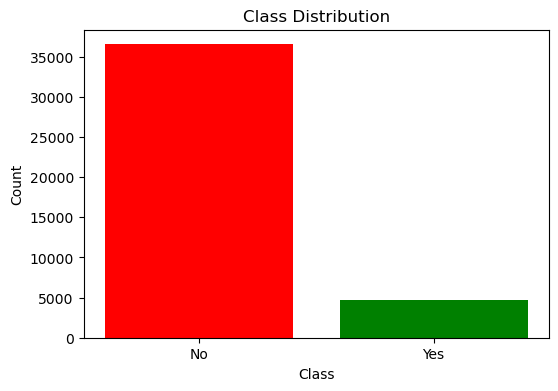

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("DataImbalance").getOrCreate()

# Assuming your DataFrame is named 'new_df'
class_distribution = new_df.groupBy("y").count().toPandas()

# Plotting the class distribution
plt.figure(figsize=(6, 4))
plt.bar(class_distribution['y'], class_distribution['count'], color=['red', 'green'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


####  Analysis:
1. FRom the above graph if we observe the yes labels that is the no of people who subscribed to deposit are few than no lables that is who do not subscribed.
2. This is 36537 no lables are there and only 4639 yes lables are there.
3. so, clearly we can say the data is imbalanced so if we feed this to model our model will be biased in results so we will handle the data imbalance using random over smapling.
4. HOw ever we have multiple techniques like random under smapling, random over smapling, smote etc.
5. we are using random over smapling that is making minor classes to balance major class yes labels to increase to no lables.

In [37]:
new_df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- emp.var.rate: double (nullable = true)
 |-- cons.price.idx: double (nullable = true)
 |-- cons.conf.idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr.employed: double (nullable = true)
 |-- job: double (nullable = false)
 |-- marital: double (nullable = false)
 |-- education: double (nullable = false)
 |-- default: double (nullable = false)
 |-- housing: double (nullable = false)
 |-- loan: double (nullable = false)
 |-- contact: double (nullable = false)
 |-- month: double (nullable = false)
 |-- day_of_week: double (nullable = false)
 |-- poutcome: double (nullable = false)
 |-- y: double (nullable = false)



In [38]:
col = "some_string"
from pyspark.sql.functions import col


#### FInding the count of majority class and minority class

In [39]:
minority_class_count = new_df.filter(col("y") == 1.0).count()
majority_class_count = new_df.filter(col("y") == 0.0).count()


### Calculating the over smaple ratio

In [40]:
oversampling_ratio = int(majority_class_count / minority_class_count)


In [41]:
oversampled_minority_df = new_df.filter(col("y") == 1.0)
for _ in range(oversampling_ratio - 1):
    oversampled_minority_df = oversampled_minority_df.union(new_df.filter(col("y") == 1.0))

balanced_df = oversampled_minority_df.union(new_df.filter(col("y") == 0.0))


### PLotting the graph to see whetehr data is balanced ornot

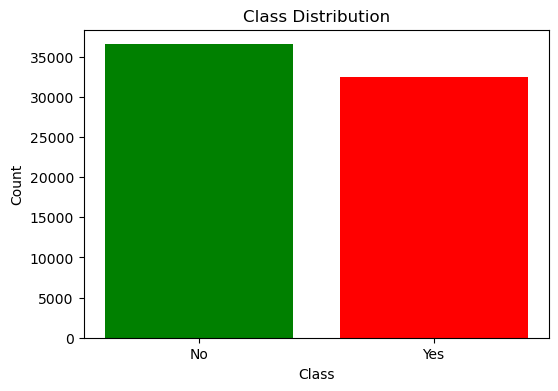

In [42]:
class_distribution = balanced_df.groupBy("y").count().toPandas()

plt.figure(figsize=(6, 4))
plt.bar(class_distribution['y'], class_distribution['count'], color=['red', 'green'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [162]:
balanced_df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- emp.var.rate: double (nullable = true)
 |-- cons.price.idx: double (nullable = true)
 |-- cons.conf.idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr.employed: double (nullable = true)
 |-- job: double (nullable = false)
 |-- marital: double (nullable = false)
 |-- education: double (nullable = false)
 |-- default: double (nullable = false)
 |-- housing: double (nullable = false)
 |-- loan: double (nullable = false)
 |-- contact: double (nullable = false)
 |-- month: double (nullable = false)
 |-- day_of_week: double (nullable = false)
 |-- poutcome: double (nullable = false)
 |-- y: double (nullable = false)



##### Note : I have used the string indexer to encode my categorical columns and overwrite in the same column names.
balanced df contains all numerical columns only 

In [43]:
balanced_df.show(1)

+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+---+
|age|duration|campaign|pdays|previous|emp.var.rate|cons.price.idx|cons.conf.idx|euribor3m|nr.employed|job|marital|education|default|housing|loan|contact|month|day_of_week|poutcome|  y|
+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+---+
| 49|    1467|       1|  999|       0|         1.1|        93.994|        -36.4|    4.857|     5191.0|2.0|    0.0|      2.0|    0.0|    1.0| 0.0|    1.0|  0.0|        1.0|     0.0|1.0|
+---+--------+--------+-----+--------+------------+--------------+-------------+---------+-----------+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+---+
only showing top 1 row



In [44]:
### Renaming the columns that having . with underscores:

from pyspark.sql.functions import col

# Assign balanced_df to a new DataFrame (freshdf)
freshdf = balanced_df

# Replace dots (.) with underscores (_) in column names with dots
for column in balanced_df.columns:
    if '.' in column:
        new_column_name = column.replace('.', '_')
        freshdf = freshdf.withColumnRenamed(column, new_column_name)

# Verify the modified column names in freshdf
freshdf.printSchema()


root
 |-- age: integer (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- emp_var_rate: double (nullable = true)
 |-- cons_price_idx: double (nullable = true)
 |-- cons_conf_idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr_employed: double (nullable = true)
 |-- job: double (nullable = false)
 |-- marital: double (nullable = false)
 |-- education: double (nullable = false)
 |-- default: double (nullable = false)
 |-- housing: double (nullable = false)
 |-- loan: double (nullable = false)
 |-- contact: double (nullable = false)
 |-- month: double (nullable = false)
 |-- day_of_week: double (nullable = false)
 |-- poutcome: double (nullable = false)
 |-- y: double (nullable = false)



####  Syandardization to scale all the columns using standard scalar 

In [45]:
from pyspark.ml.feature import VectorAssembler, StandardScaler

# List of numerical column names (excluding the target column 'y')
numerical_columns = [
    'age', 'duration', 'campaign', 'pdays', 'previous',
    'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed'
]

# Assemble numerical columns into a single feature vector
assembler = VectorAssembler(inputCols=numerical_columns, outputCol="features")
assembled_df = assembler.transform(freshdf)

# Initialize the StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)

# Fit and transform the data
scaler_model = scaler.fit(assembled_df)
scaled_df = scaler_model.transform(assembled_df)

# Show scaled features
scaled_df.select("scaled_features", "y").show(truncate=False)


+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---+
|scaled_features                                                                                                                                                                                           |y  |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---+
|[0.7226602418822081,3.0704533470416546,-0.5664332012508904,0.34438321706085495,-0.4408143133033636,0.9013148819940492,0.8061421977456652,0.7198150841966467,0.9751832767962026,0.6135989719835014]        |1.0|
|[0.9742288002188892,1.6616331803609241,1.5163658065350012,0.34438321706085495,-0.4408143133033636,0.9013148819940492,0.8061421977456652,0.7198150841966467,0.975713

#### Splitting the data in to train and test set (70/30 ratio)

In [46]:
# Split the data into training and testing sets (70% training, 30% testing)
train_ratio = 0.7
test_ratio = 1.0 - train_ratio

# Randomly split the data
train_df, test_df = scaled_df.randomSplit([train_ratio, test_ratio], seed=42)

# Show the number of records in each set
print("Number of records in training set: {}".format(train_df.count()))
print("Number of records in testing set: {}".format(test_df.count()))


Number of records in training set: 48424
Number of records in testing set: 20586


#### Data modeling and Analysis: 

1. Our problem is a binary classification problem.
2. We are going to apply four  models for our dataset and see which is going to give good results in predicting our target that is whetehr the client is going to subscribe or not
3. Four models are  1 Logistic regression  2. Decision tree  3. LInear SVC 4. MLP classifier

#### FItting the LOgistic regression model

In [61]:
from pyspark.ml.classification import LogisticRegression

# Initialize the Logistic Regression model
lr = LogisticRegression(featuresCol='scaled_features', labelCol='y', predictionCol='prediction')


In [62]:
# Fit the Logistic Regression model on the training data
lr_model = lr.fit(train_df)


In [63]:
# Make predictions on the test data
predictions = lr_model.transform(test_df)


In [64]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol='y', rawPredictionCol='prediction', metricName='areaUnderROC')
accuracy = evaluator.evaluate(predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 84.92%


In [65]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

# Evaluate precision, recall, and F1-score
evaluator = MulticlassClassificationEvaluator(labelCol='y', predictionCol='prediction', metricName='weightedPrecision')
precision = evaluator.evaluate(predictions)

evaluator.setMetricName('weightedRecall')
recall = evaluator.evaluate(predictions)

evaluator.setMetricName('f1')
f1_score = evaluator.evaluate(predictions)

# Calculate AUC-ROC
binary_evaluator = BinaryClassificationEvaluator(labelCol='y')
auc_roc = binary_evaluator.evaluate(predictions)

print("Precision: {:.2f}".format(precision * 100))
print("Recall: {:.2f}".format(recall * 100))
print("F1-score: {:.2f}".format(f1_score * 100))
print("AUC-ROC: {:.2f}".format(auc_roc * 100))

# Calculate confusion matrix
predictionAndLabels = predictions.select('prediction', 'y').rdd
metrics = MulticlassMetrics(predictionAndLabels)
confusion_matrix = metrics.confusionMatrix()

print("Confusion Matrix:")
print(confusion_matrix)


Precision: 84.99
Recall: 84.99
F1-score: 84.99
AUC-ROC: 92.57
Confusion Matrix:
DenseMatrix([[9412., 1507.],
             [1582., 8085.]])


#### FItting the deciison tree 

In [66]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(featuresCol='scaled_features', labelCol='y', predictionCol='prediction')

# Fit the Decision Tree model on the training data
dt_model = dt.fit(train_df)

# Make predictions on the test data
dt_predictions = dt_model.transform(test_df)

# Evaluate precision, recall, F1-score, accuracy, and AUC-ROC
evaluator = MulticlassClassificationEvaluator(labelCol='y', predictionCol='prediction', metricName='weightedPrecision')
precision = evaluator.evaluate(dt_predictions)

evaluator.setMetricName('weightedRecall')
recall = evaluator.evaluate(dt_predictions)

evaluator.setMetricName('f1')
f1_score = evaluator.evaluate(dt_predictions)

evaluator.setMetricName('accuracy')
accuracy = evaluator.evaluate(dt_predictions)

# Calculate AUC-ROC
binary_evaluator = BinaryClassificationEvaluator(labelCol='y')
auc_roc = binary_evaluator.evaluate(dt_predictions)

print("Decision Tree Metrics:")
print("Precision: {:.2f}".format(precision * 100))
print("Recall: {:.2f}".format(recall * 100))
print("F1-score: {:.2f}".format(f1_score * 100))
print("Accuracy: {:.2f}".format(accuracy * 100))
print("AUC-ROC: {:.2f}".format(auc_roc * 100))

# Calculate confusion matrix
predictionAndLabels = dt_predictions.select('prediction', 'y').rdd
metrics = MulticlassMetrics(predictionAndLabels)
confusion_matrix = metrics.confusionMatrix()

print("Confusion Matrix:")
print(confusion_matrix)


Decision Tree Metrics:
Precision: 87.00
Recall: 86.69
F1-score: 86.70
Accuracy: 86.69
AUC-ROC: 86.10


Confusion Matrix:
DenseMatrix([[9129., 1790.],
             [ 950., 8717.]])


#### LInear SVC 

In [67]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

# Initialize the LinearSVC model
svc = LinearSVC(featuresCol='scaled_features', labelCol='y', predictionCol='prediction')

# Fit the LinearSVC model on the training data
svc_model = svc.fit(train_df)

# Make predictions on the test data
svc_predictions = svc_model.transform(test_df)

# Evaluate accuracy, precision, recall, F1-score, and AUC-ROC
evaluator = MulticlassClassificationEvaluator(labelCol='y', predictionCol='prediction', metricName='weightedPrecision')
precision = evaluator.evaluate(svc_predictions)

evaluator.setMetricName('weightedRecall')
recall = evaluator.evaluate(svc_predictions)

evaluator.setMetricName('f1')
f1_score = evaluator.evaluate(svc_predictions)

evaluator.setMetricName('accuracy')
accuracy = evaluator.evaluate(svc_predictions)

# Calculate AUC-ROC
binary_evaluator = BinaryClassificationEvaluator(labelCol='y')
auc_roc = binary_evaluator.evaluate(svc_predictions)

print("LinearSVC Metrics:")
print("Precision: {:.2f}".format(precision * 100))
print("Recall: {:.2f}".format(recall * 100))
print("F1-score: {:.2f}".format(f1_score * 100))
print("Accuracy: {:.2f}".format(accuracy * 100))
print("AUC-ROC: {:.2f}".format(auc_roc * 100))

# Calculate confusion matrix
predictionAndLabels = svc_predictions.select('prediction', 'y').rdd
metrics = MulticlassMetrics(predictionAndLabels)
confusion_matrix = metrics.confusionMatrix()

print("Confusion Matrix:")
print(confusion_matrix)


LinearSVC Metrics:
Precision: 85.20
Recall: 85.16
F1-score: 85.17
Accuracy: 85.16
AUC-ROC: 92.48
Confusion Matrix:
DenseMatrix([[9271., 1648.],
             [1407., 8260.]])


#### MLP classifier

In [68]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.mllib.evaluation import MulticlassMetrics

# Define the layers for the MLP classifier
num_features = len(freshdf.columns) - 1  # Exclude the target column 'y'
layers = [num_features, 128, 64, 2]  # Input layer: number of features, hidden layers: 128 and 64, output layer: 2 for binary classification

# Assemble features into a single column 'scaled_features'
assembler = VectorAssembler(inputCols=freshdf.columns[:-1], outputCol='scaled_features')
assembled_df = assembler.transform(freshdf)

# Initialize the MLP classifier model
mlp = MultilayerPerceptronClassifier(featuresCol='scaled_features', labelCol='y', predictionCol='prediction', layers=layers, blockSize=128, seed=1234)

# Fit the MLP classifier model on the assembled data
mlp_model = mlp.fit(assembled_df)

# Make predictions on the test data
mlp_predictions = mlp_model.transform(assembled_df)

# Evaluate accuracy, precision, recall, F1-score, and AUC-ROC
evaluator = MulticlassClassificationEvaluator(labelCol='y', predictionCol='prediction', metricName='weightedPrecision')
precision = evaluator.evaluate(mlp_predictions)

evaluator.setMetricName('weightedRecall')
recall = evaluator.evaluate(mlp_predictions)

evaluator.setMetricName('f1')
f1_score = evaluator.evaluate(mlp_predictions)

evaluator.setMetricName('accuracy')
accuracy = evaluator.evaluate(mlp_predictions)

# Calculate AUC-ROC
binary_evaluator = BinaryClassificationEvaluator(labelCol='y')
auc_roc = binary_evaluator.evaluate(mlp_predictions)

print("MLP Classifier Metrics:")
print("Precision: {:.2f}".format(precision * 100))
print("Recall: {:.2f}".format(recall * 100))
print("F1-score: {:.2f}".format(f1_score * 100))
print("Accuracy: {:.2f}".format(accuracy * 100))
print("AUC-ROC: {:.2f}".format(auc_roc * 100))

# Calculate confusion matrix
predictionAndLabels = mlp_predictions.select('prediction', 'y').rdd
metrics = MulticlassMetrics(predictionAndLabels)
confusion_matrix = metrics.confusionMatrix()

print("Confusion Matrix:")
print(confusion_matrix)


MLP Classifier Metrics:
Precision: 84.02
Recall: 83.78
F1-score: 83.79
Accuracy: 83.78
AUC-ROC: 91.27


Confusion Matrix:
DenseMatrix([[29702.,  6835.],
             [ 4361., 28112.]])


In [3]:
### finally stopping the session:
spark.stop()

### Result analysis

| Model                | Accuracy | Precision | Recall  | F1 Score | AUC-ROC |
|----------------------|----------|-----------|---------|----------|---------|
| Logistic Regression  | 84.92    | 84.99     | 84.99   | 84.99    | 92.57   |
| Decision Trees       | 86.69    | 87.00     | 86.69   | 86.70    | 86.10   |
| Linear SVC           | 85.16    | 85.20     | 85.16   | 85.17    | 92.48   |
| MLP Classifier       | 83.78    | 84.02     | 83.78   | 83.79    | 91.27   |


#### CHoosing the best metric :

1. Evaluating the business scenario  for TP, TN, FP, FN :

False Positive (FP):
Scenario 1: A False Positive occurs when the model predicts that a customer will subscribe to a deposit, but they do not. In this case, the bank might allocate resources for onboarding and servicing the customer, which results in unnecessary costs without any return on investment.

Scenario 2: Another False Positive scenario is when the model predicts a successful subscription, leading to the bank extending credit or benefits to the customer based on this prediction. If the customer does not actually subscribe, the bank may face financial losses or issues related to regulatory compliance.

False Negative (FN):
Scenario 1: A False Negative occurs when the model predicts that a customer will not subscribe to a deposit, but they actually do. In this case, the bank misses out on a potential subscription, leading to lost revenue opportunities and the inability to nurture the customer relationship.

Scenario 2: Another False Negative scenario is when the model fails to identify a customer likely to subscribe. If these customers are not targeted with promotional offers or personalized communication, the bank may lose market share to competitors who successfully engage with these customers.

True Positive (TP):
Scenario 1: A True Positive occurs when the model correctly predicts that a customer will subscribe to a deposit, allowing the bank to tailor marketing efforts and financial products to these customers effectively. This targeted approach can lead to increased customer satisfaction and loyalty.

Scenario 2: Another True Positive scenario is when the model accurately predicts successful subscriptions. With this insight, the bank can analyze the characteristics of these customers, enabling the development of more appealing products and services for similar prospects, thereby boosting overall revenue.

True Negative (TN):
Scenario 1: A True Negative occurs when the model correctly predicts that a customer will not subscribe to a deposit, allowing the bank to focus resources on other areas of the business. For example, the bank can allocate marketing budgets to other campaigns or customer segments with higher subscription potential.

Scenario 2: Another True Negative scenario is when the model accurately identifies customers who are unlikely to subscribe. By avoiding unnecessary promotional activities with these customers, the bank can optimize marketing expenses and improve the efficiency of their campaigns.


Understanding these scenarios helps the bank in making strategic decisions, optimizing marketing campaigns, and maximizing the return on investment in their marketing efforts.



1. SO, we want to leevrage the effects of both FP, FN equally and also some general considerations in choosing best metric are :

If FN > FP then we have to maximize the recall and in this case recall turns out to be best metric
IF FP > FN maximize preciison in this case preciisn turns out to be the best metric.
If the data is imbalanced and is not adressed then accuracy or auc-roc can be considered.
How ever we handled the data imbalance and want to leverage the effects of  both FP FN equally so we are considering F1 score as best metric.


### CHoosing the best model :

1. we can do hyper parameter tuning using randomized search cv or grid search cv for furthur enhancement or improviizng the results.
2. How ever as of the results that we observe the deciison tree is the model of highest f1 score best metric of 86.70
3 So, finally we can say deciison trees are best model and f1 score is best metric